In [37]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit
import numpy as np

matplotlib.rcParams['path.simplify'] = False

# Co-occurrence Net

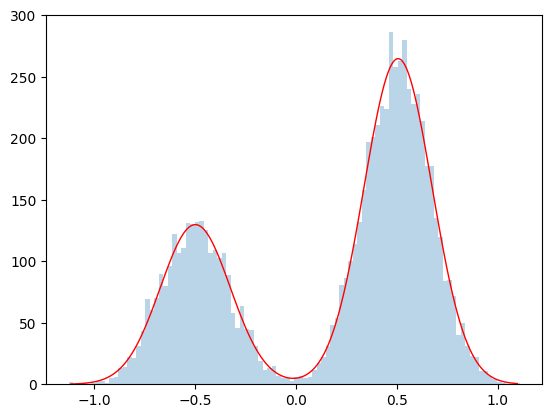

In [38]:
mu, sigma = 0.5, 0.17
mu2, sigma2 = -0.5, 0.17
#data generation
np.random.seed(123)
data=np.concatenate((np.random.normal(mu, sigma, 5000), np.random.normal(mu2, sigma2, 2500)))
y,x,_=plt.hist(data, 100, alpha=.3, label='data')
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

#x, y inputs can be lists or 1D numpy arrays

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected = (mu, sigma, 250, mu2, sigma2, 125)
params, cov = curve_fit(bimodal, x, y, expected)
sigma=np.sqrt(np.diag(cov))
x_fit = np.linspace(x.min(), x.max(), 500)
#plot combined...
plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=1, label='model')
plt.savefig("4-bimodal.pdf", format="pdf", bbox_inches="tight")
plt.show() 

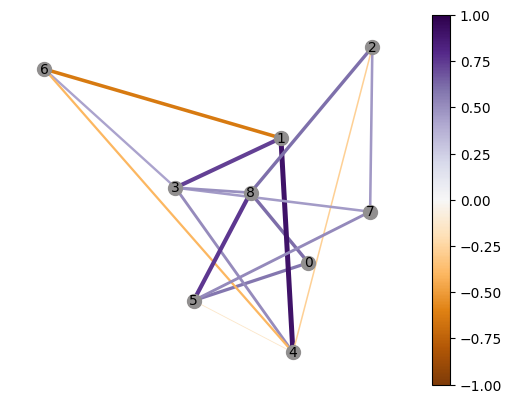

In [39]:
G = nx.erdos_renyi_graph(9, 0.5)
for e in G.edges():
    weight = 0
    # ensure we only give weights between -1 and 1 that are non zero
    while not (-1 <= weight <= 1) or weight == 0:
        weight = np.random.choice(data)
    G[e[0]][e[1]]['weight']  = weight

fig = plt.figure()
ax = fig.add_subplot()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nw_weights = tuple(x+1 for x in weights)
widths = tuple(abs(4*x) for x in weights)
pos = nx.spring_layout(G, k=1)
d = dict(G.degree)
nx.draw_networkx_nodes(G, pos, node_color='#918F8F', node_size=100, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='k')
edge_collection = nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.PuOr, width=widths, edge_vmin=-1, edge_vmax=1, ax=ax)
plt.colorbar(edge_collection)
plt.box(False)
plt.savefig("4-co-occ-net.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [40]:
json.dumps(nx.node_link_data(G))

'{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}], "links": [{"weight": 0.5826312884833548, "source": 0, "target": 5}, {"weight": 0.6148356427539814, "source": 0, "target": 8}, {"weight": 0.7306576990838498, "source": 1, "target": 3}, {"weight": 0.9003900420385831, "source": 1, "target": 4}, {"weight": -0.638579754693958, "source": 1, "target": 6}, {"weight": -0.27796656418881527, "source": 2, "target": 4}, {"weight": 0.46123412849139406, "source": 2, "target": 7}, {"weight": 0.6068144174853789, "source": 2, "target": 8}, {"weight": 0.5112680070896285, "source": 3, "target": 4}, {"weight": 0.42525572507758125, "source": 3, "target": 6}, {"weight": 0.4601658168250095, "source": 3, "target": 7}, {"weight": 0.4943223393958548, "source": 3, "target": 8}, {"weight": -0.14671525430854027, "source": 4, "target": 5}, {"weight": -0.4038872117981791, "source": 4, "target": 6}, {"weig

In [41]:
G = nx.node_link_graph(json.loads('{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}], "links": [{"weight": 0.5826312884833548, "source": 0, "target": 2}, {"weight": 0.6148356427539814, "source": 0, "target": 3}, {"weight": 0.7306576990838498, "source": 0, "target": 5}, {"weight": 0.9003900420385831, "source": 0, "target": 9}, {"weight": -0.638579754693958, "source": 0, "target": 11}, {"weight": -0.27796656418881527, "source": 1, "target": 3}, {"weight": 0.46123412849139406, "source": 1, "target": 4}, {"weight": 0.6068144174853789, "source": 1, "target": 6}, {"weight": 0.5112680070896285, "source": 1, "target": 7}, {"weight": 0.42525572507758125, "source": 1, "target": 10}, {"weight": 0.4601658168250095, "source": 1, "target": 11}, {"weight": 0.4943223393958548, "source": 2, "target": 5}, {"weight": -0.14671525430854027, "source": 2, "target": 6}, {"weight": -0.4038872117981791, "source": 2, "target": 7}, {"weight": 0.5176903249517476, "source": 2, "target": 9}, {"weight": 0.7534244447856359, "source": 3, "target": 4}, {"weight": 0.5244768288592718, "source": 3, "target": 7}, {"weight": 0.7363358287149884, "source": 3, "target": 8}, {"weight": 0.631262017598583, "source": 3, "target": 9}, {"weight": 0.13566419265027413, "source": 4, "target": 5}, {"weight": 0.7444351489453024, "source": 4, "target": 7}, {"weight": -0.4320948133020824, "source": 4, "target": 8}, {"weight": -0.581091373256546, "source": 4, "target": 10}, {"weight": 0.32431559110760866, "source": 4, "target": 11}, {"weight": -0.8711066258559395, "source": 5, "target": 6}, {"weight": 0.41156905052366743, "source": 5, "target": 7}, {"weight": 0.5099768645364847, "source": 5, "target": 8}, {"weight": 0.4833008102788417, "source": 5, "target": 9}, {"weight": 0.5195853232070693, "source": 5, "target": 11}, {"weight": 0.13289492016299193, "source": 6, "target": 7}, {"weight": 0.3292758342014238, "source": 6, "target": 9}, {"weight": 0.2234641095013591, "source": 6, "target": 10}, {"weight": 0.4832578406676551, "source": 7, "target": 10}, {"weight": 0.4634528823561386, "source": 7, "target": 11}, {"weight": 0.5923304281865012, "source": 8, "target": 10}]}'))

# Trophic Net

In [42]:
G = nx.DiGraph()

G.add_nodes_from(
    [
        (0, {"organism": "bacteria"}),
        (1, {"organism": "fungi"}),
        #(2, {"organism": "amoebae"}),
        #(3, {"organism": "flagellates"}),
        (2, {"organism": "root-feeding nematodes"}),
        (3, {"organism": "bacterivorous nematodes"}),
        (4, {"organism": "fungivorous nematodes"}),
        (5, {"organism": "omnivorous nematodes"}),
        (6, {"organism": "fungivorous mites"}),
        (7, {"organism": "omnivorous mites"}),
        (8, {"organism": "collembolans"}),
        (9, {"organism": "som"}),
    ]
)
G.add_edge(0, 3)
G.add_edge(0, 5)

G.add_edge(1, 4)
G.add_edge(1, 6)
G.add_edge(1, 8)

G.add_edge(2, 5)
G.add_edge(2, 7)

G.add_edge(3, 5)
G.add_edge(3, 7)

G.add_edge(4, 5)
G.add_edge(4, 7)

G.add_edge(5, 7)

G.add_edge(6, 7)

G.add_edge(8, 7)

G.add_edge(9, 0)
G.add_edge(9, 1)
G.add_edge(9, 2)

json.dumps(nx.node_link_data(G))

'{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"organism": "bacteria", "id": 0}, {"organism": "fungi", "id": 1}, {"organism": "root-feeding nematodes", "id": 2}, {"organism": "bacterivorous nematodes", "id": 3}, {"organism": "fungivorous nematodes", "id": 4}, {"organism": "omnivorous nematodes", "id": 5}, {"organism": "fungivorous mites", "id": 6}, {"organism": "omnivorous mites", "id": 7}, {"organism": "collembolans", "id": 8}, {"organism": "som", "id": 9}], "links": [{"source": 0, "target": 3}, {"source": 0, "target": 5}, {"source": 1, "target": 4}, {"source": 1, "target": 6}, {"source": 1, "target": 8}, {"source": 2, "target": 5}, {"source": 2, "target": 7}, {"source": 3, "target": 5}, {"source": 3, "target": 7}, {"source": 4, "target": 5}, {"source": 4, "target": 7}, {"source": 5, "target": 7}, {"source": 6, "target": 7}, {"source": 8, "target": 7}, {"source": 9, "target": 0}, {"source": 9, "target": 1}, {"source": 9, "target": 2}]}'

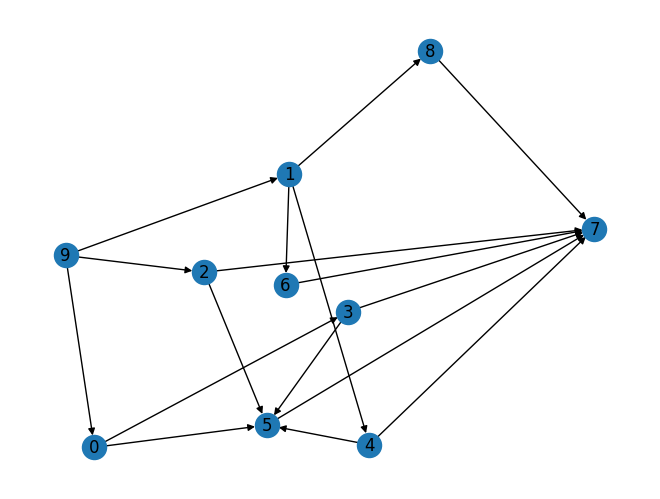

In [43]:
options = {
    "node_color": "black",
    "node_size": 100,
    "width": 3,
}
nx.draw(G, with_labels=True)

In [44]:
len(G.nodes())-1

9

In [45]:
G[12]

KeyError: 12

In [ ]:
weights = {}
for type_id in range(12):
    weights[type_id] = G.get_edge_data(0, type_id)

In [ ]:
weights

{0: None,
 1: None,
 2: None,
 3: {'weight': -0.5},
 4: {'weight': -0.5},
 5: None,
 6: {'weight': -0.5},
 7: None,
 8: {'weight': -0.5},
 9: None,
 10: None,
 11: None}

In [ ]:
srt_net = sorted(
    G.degree, key=lambda x: x[1], reverse=True
)

In [ ]:
for i in range(12):
    print(G.in_edges(i))

[(12, 0)]
[(12, 1)]
[(12, 2)]
[(0, 3), (4, 3)]
[(0, 4)]
[(12, 5)]
[(0, 6)]
[(1, 7), (2, 7)]
[(0, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]
[(1, 9), (2, 9)]
[(5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (11, 10)]
[(1, 11), (2, 11)]


In [ ]:
srt_net

[(8, 7),
 (10, 6),
 (0, 5),
 (1, 4),
 (2, 4),
 (7, 4),
 (12, 4),
 (3, 3),
 (4, 3),
 (5, 3),
 (6, 3),
 (9, 3),
 (11, 3)]

In [ ]:
def von_neumann_offsets(range_limit):
    offsets = []
    for i in range(-range_limit, range_limit + 1):
        for j in range(-range_limit, range_limit + 1):
            for k in range(-range_limit, range_limit + 1):
                if abs(i) + abs(j) + abs(k) <= range_limit and (i == 0 or j == 0 or k == 0):
                    offsets.append((i, j, k))
    return offsets

# Example range
r = 1

von_neumann_offsets_list = von_neumann_offsets(r)
print("Von Neumann offsets with range up to", r, ":")
print(von_neumann_offsets_list)

Von Neumann offsets with range up to 1 :
[(-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)]
